ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1
 
1. Загрузите изображение в оттенках серого sar_1_gray.jpg
Изображение sar_1_gray.jpg успешно загружено:


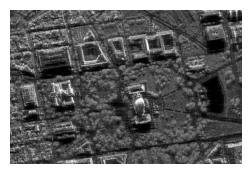

 
2. Постройте гистограмму


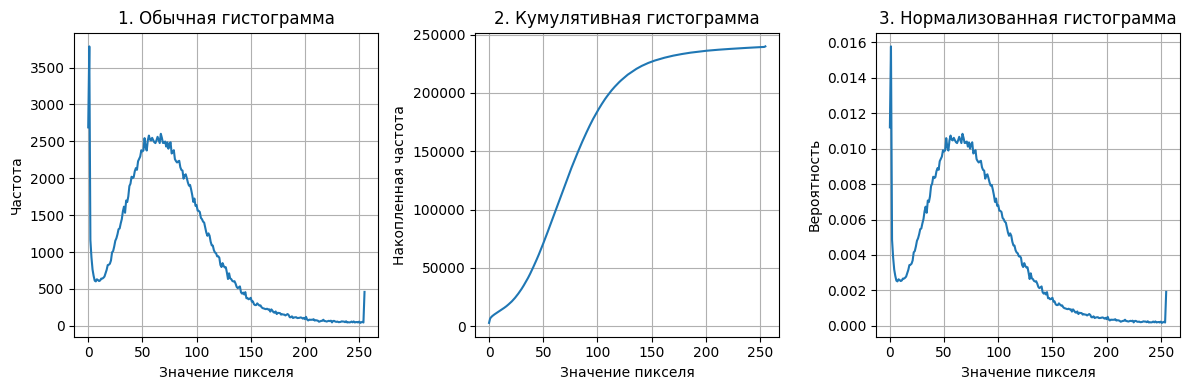

 
3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1


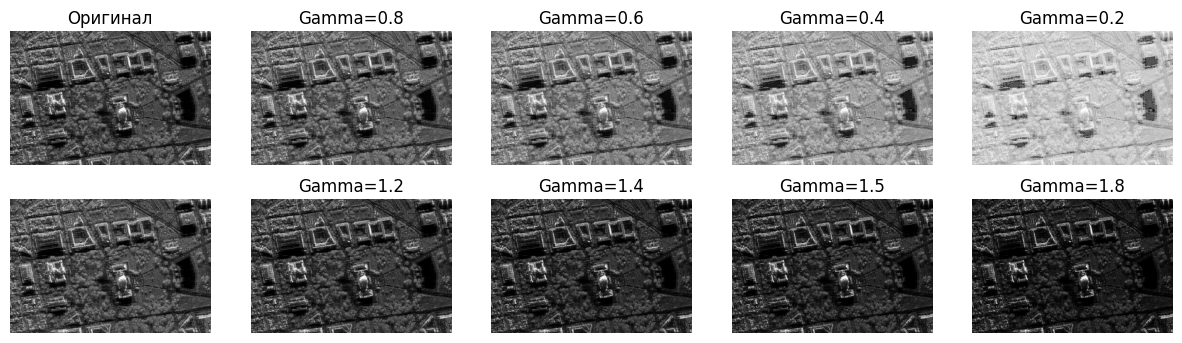

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
import os

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1")
print("="*50)
print(" ")

###1 ЗАДАНИЕ : Загрузите изображение в оттенках серого sar_1_gray.jpg
print("1. Загрузите изображение в оттенках серого sar_1_gray.jpg")
image = cv2.imread('sar_1_gray.jpg')   # Загружаем изображение
if image is None:
    print("Изображение не найдено")
else:
    print("Изображение sar_1_gray.jpg успешно загружено:")
# Отображаем в блокноте
plt.figure(figsize=(8, 2))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()
print(" ")



###2 ЗАДАНИЕ: постройте гистограмму
print("2. Постройте гистограмму")
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist / (image.shape[0] * image.shape[1])

plt.figure(figsize=(12, 4))

# 1. Обычная гистограмма
plt.subplot(1, 3, 1)
plt.plot(b_hist)
plt.title('1. Обычная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Частота')
plt.grid(True)

# 2. Кумулятивная гистограмма
plt.subplot(1, 3, 2)
plt.plot(b_hist_cum)
plt.title('2. Кумулятивная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Накопленная частота')
plt.grid(True)

# 3. Нормализованная гистограмма
plt.subplot(1, 3, 3)
plt.plot(b_hist_norm)
plt.title('3. Нормализованная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Вероятность')
plt.grid(True)

plt.tight_layout()
plt.show()
print(" ")



###3 ЗАДАНИЕ: реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# формула Rcor = (Runcor / Rmax)^y * Rmax
print("3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1")
def gamma_correction(R_uncor, gamma: float):
    R_max = 255.0
    R_cor = ((R_uncor / R_max) ** gamma) * R_max
    return np.uint8(R_cor)

gamma_val = [0.8, 0.6, 0.4, 0.2, 1.0, 1.2, 1.4, 1.5, 1.8 ]
plt.figure(figsize=(15, 4))

# Оригинал
plt.subplot(2, 5, 1)
plt.imshow(image)
plt.title("Оригинал")
plt.axis("off")

# Результаты с разными gamma
for i in range(len(gamma_val)):
    plt.subplot(2, 5, i+2)
    gamma = gamma_val[i]
    image_gamma = gamma_correction(image, gamma)
    plt.imshow(image_gamma)
    if (i != 4):
        plt.title(f"Gamma={gamma}")
    plt.axis("off")
plt.show()
print(" ")

